---

# 🌟 **SYS862** 🌟  

---

## 🧠 **Apprentissage profond : fondements et applications à la mécanique computationnelle**  

---

### ✍️ **Auteurs**  
**Mathieu Mullins**  
**Azzeddine Soulaïmani**  

---

📅 **Date :** *28 mars 2025*  

---


---




---

# 🔬 **Laboratoire X : RNN**  

---

---

Description du laboratoire X

---

Dans ce laboratoire, nous allons explorer l'utilisation des réseaux de neurones récurrents (RNN) pour la prévision de séries temporelles, en particulier dans le contexte de la prévision météorologique. Nous comparerons trois architectures populaires : LSTM (Long Short-Term Memory), GRU (Gated Recurrent Unit) et TCN (Temporal Convolutional Network). Ces modèles seront implémentés avec PyTorch et entraînés sur un jeu de données météorologiques. L'objectif est d'observer leurs performances respectives en termes de précision de prédiction et d'efficacité computationnelle. À la fin de ce laboratoire, vous devriez être en mesure de comprendre et d'appliquer plusieurs modèles de machine learning pour la prévision de séries temporelles (time-series forecasting).



---

## Rappel: Les réseaux de neuronnes récurrents

---

Les réseaux de neurones récurrents (RNN) sont une classe de réseaux de neurones conçus pour traiter des données séquentielles, telles que le texte, l’audio ou les séries temporelles. Contrairement aux réseaux de neurones classiques (MLP), les RNN possèdent des connexions récurrentes qui leur permettent de conserver une mémoire des informations passées.

Un RNN est défini par l’équation de récurrence suivante :

$h_t = f(W_h h_{t-1} + W_x x_t + b)$


où :

- $h_t$ est l’état caché à l’instant $t$,
- $x_t$ est l’entrée à l’instant $t$,
- $W_h$ et $W_x$ sont des matrices de poids,
- $b$ est un biais,
- $f$ est une fonction d’activation, typiquement une tangente hyperbolique ($\tanh$) ou une fonction ReLU.

**Limitations des RNN classiques**


Les RNN souffrent de plusieurs limitations, notamment :

- **Le problème du gradient évanescent/explosif (vanishing/exploding)** : Lorsque la dépendance temporelle est longue, les gradients peuvent devenir extrêmement petits (**évanescence**) ou très grands (**explosion**), ce qui rend l’apprentissage difficile.
- **Difficulté à capturer les dépendances à long terme** : Les RNN classiques ont du mal à retenir des informations sur de longues séquences.

Pour pallier ces problèmes, des variantes comme **LSTM** et **GRU** ont été développées, introduisant des **mécanismes de portes** pour mieux gérer la mémoire à long terme. Plus récemment, les **réseaux convolutifs temporels (TCN)** ont été proposés comme une alternative efficace aux architectures récurrentes. Les **TCN** ne sont donc pas des RNN, mais sont tout de même une alternative intéressante à étudier.

---
## Rappel : Les Long Short-Term Memory (LSTM)
---
Les **LSTM** ont été conçus en 1997 spécifiquement pour résoudre des problèmes séquentiels comme la prévision de séries chronologiques ou le traitement de langage naturel (**Hochreiter & Schmidhuber, 1997**). En utilisant des **portes** (*gates*), cette famille de réseaux est capable de **stocker de l’information à long terme ou à court terme**, facilitant ainsi la détection de relations complexes dans les données.

Chaque cellule d’un LSTM contient trois types de portes :

- **Une porte d’entrée** (*input gate*),
- **Une porte d’oubli** (*forget gate*),
- **Une porte de sortie** (*output gate*).

Ces portes agissent comme des filtres pour extraire et conserver les informations essentielles. Grâce à ces mécanismes, les LSTM ont longtemps été considérés comme **l’architecture de choix** pour les réseaux de neurones profonds appliqués aux problèmes séquentiels.

### Formulation mathématique d'une cellule LSTM

À chaque instant temporel $t$, une cellule LSTM est définie par les équations suivantes :

1. **Porte d’oubli** : Détermine quelle partie de la mémoire précédente doit être conservée.

   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$

2. **Porte d’entrée** : Décide quelles nouvelles informations doivent être stockées dans l’état de la cellule.

   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$

   $$
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$

3. **Mise à jour de l’état de la cellule** : Combinaison des informations conservées et des nouvelles informations.

   $$
   C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
   $$

4. **Porte de sortie** : Détermine la sortie de la cellule LSTM.

   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$

   $$
   h_t = o_t \odot \tanh(C_t)
   $$

où :

- $x_t$ est l’entrée actuelle,
- $h_{t-1}$ est l’état caché précédent,
- $C_t$ est l’état de la cellule à l’instant $t$,
- $W_f, W_i, W_C, W_o$ et $b_f, b_i, b_C, b_o$ sont les matrices de poids et biais,
- $\sigma$ est la fonction sigmoïde,
- $\tanh$ est la fonction tangente hyperbolique,
- $\odot$ représente le produit élément-wise.

Grâce à cette architecture, les LSTM peuvent capturer des **dépendances à long terme** tout en évitant le problème du **gradient évanescent**.


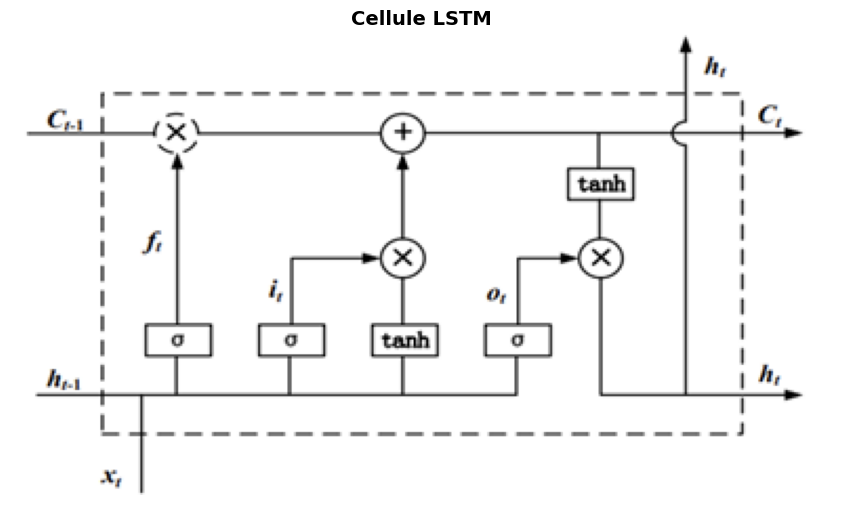

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement de l'image PNG
image = mpimg.imread('lstm_cell.png')

# Affichage de l'image
plt.figure(figsize=(16, 6))
plt.imshow(image)
plt.axis('off')  # Masquer les axes pour un affichage plus propre
plt.title('Cellule LSTM', fontsize=14, fontweight='bold')
plt.show()

---
## Rappel : Les Gated Recurrent Units (GRU)
---

Proposés en 2014 comme étant une alternative aux LSTM, les **GRU** font partie de la grande famille des RNN et utilisent des portes pour stocker de l’information à long terme et mitiger les effets du gradient disparaissant. Cependant, les GRU se distinguent par leur simplicité, utilisant seulement deux portes au lieu des trois que l'on trouve dans les LSTM. En n’utilisant qu’une porte de mise à jour et une porte de réinitialisation, l’information importante est gardée tout en demandant moins de ressources informatiques que les LSTM (Cho et al., 2014). Cela les rend intéressants pour les applications d’analyses séquentielles de données où la mémoire disponible est petite.

Chaque cellule d’un GRU contient deux types de portes :

- **Une porte de réinitialisation** (*reset gate*),
- **Une porte de mise à jour** (*update gate*),


### Formulation mathématique d'une cellule GRU

À chaque instant temporel $t$, une cellule GRU est définie par les équations suivantes :

1. **Porte de mise à jour** : Contrôle dans quelle mesure l’état précédent est conservé.

   $$
   z_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_z)
   $$

2. **Porte de réinitialisation** : Contrôle dans quelle mesure l’état précédent est oublié.

   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
   $$


3. **Calcul du nouvel état candidat**

   $$
   \tilde{h_t} = \tanh(W_h \cdot [r_t \odot h_{t-1},x_t]+b_h)
   $$

4. **Mise à jour de l’état caché**

   $$
   h_t = (1-z_t) \odot h_{t-1} + z_t \odot \tilde{h_t}
   $$

où :

- $x_t$ est l’entrée actuelle,
- $h_{t-1}$ est l’état caché précédent,
- $W_z, W_r, W_h$ et $b_z, b_r, b_h$ sont les matrices de poids et biais,
- $\sigma$ est la fonction sigmoïde,
- $\tanh$ est la fonction tangente hyperbolique,
- $\odot$ représente le produit élément-wise.

Grâce à leur conception plus simple et efficace, les GRU offrent un bon compromis entre performance et coût computationnel, ce qui les rend adaptés à de nombreuses applications en traitement du langage naturel et en prévision de séries temporelles.


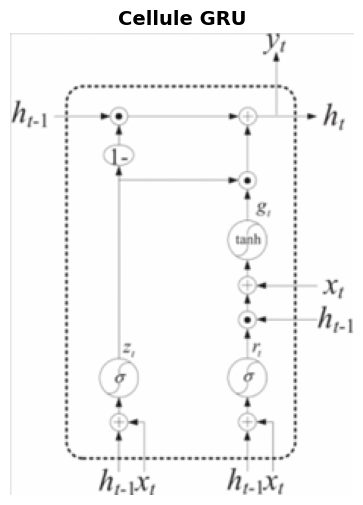

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement de l'image PNG
image = mpimg.imread('gru_cell.png')

# Affichage de l'image
plt.figure(figsize=(16, 6))
plt.imshow(image)
plt.axis('off')  # Masquer les axes pour un affichage plus propre
plt.title('Cellule GRU', fontsize=14, fontweight='bold')
plt.show()

---
## Rappel : Les Temporal Convolutional Networks (TCN)
---

Les **Temporal Convolutional Networks (TCN)** ont été introduits en 2018 par Bai et al. comme une alternative aux réseaux de neurones récurrents (RNN) pour traiter des problèmes séquentiels. Bien que les réseaux de neurones convolutifs (CNN) soient traditionnellement utilisés pour le traitement d'images, les TCN adaptent ces principes pour les séquences temporelles. Les TCN sont conçus pour capturer des dépendances à long terme dans les données séquentielles tout en offrant des avantages significatifs en termes de mémoire et de parallélisation par rapport aux RNN.

### Architecture des TCN

Les TCN reposent sur deux principes clés :

1. **Convolutions causales** : Contrairement aux convolutions standard, les convolutions causales garantissent que la sortie à un instant $t$ ne dépend que des entrées aux instants précédents ou égaux à $t$. Cela préserve la nature temporelle des données.

2. **Dilatation** : Les convolutions dilatées permettent d'augmenter la portée temporelle des filtres sans augmenter le nombre de paramètres. Cela permet aux TCN de capturer des dépendances à long terme avec une complexité computationnelle réduite.

Les TCN utilisent également des **blocs résiduels**, qui incluent des couches de dropout, de normalisation des poids et des convolutions causales. Ces blocs résiduels facilitent l'apprentissage de modèles profonds en permettant un flux d'information plus fluide à travers le réseau.

### Formulation mathématique des TCN

À chaque instant temporel $t$, une couche de convolution causale avec dilatation est définie par :

$$
y_t = \sum_{k=0}^{K-1} w_k \cdot x_{t - d \cdot k}
$$

où :

- $x_t$ est l’entrée à l’instant $t$,
- $y_t$ est la sortie à l’instant $t$,
- $w_k$ sont les poids du filtre,
- $K$ est la taille du filtre,
- $d$ est le facteur de dilatation.

Les blocs résiduels combinent plusieurs couches de convolutions causales avec des fonctions d'activation et des opérations de normalisation pour améliorer la stabilité de l'apprentissage.

### Avantages des TCN par rapport aux RNN

Les TCN présentent plusieurs avantages par rapport aux RNN, notamment les LSTM et les GRU :

1. **Moins de mémoire** : Les TCN n'utilisent pas de portes pour préserver l'information à long terme, ce qui réduit significativement la mémoire nécessaire lors de l'apprentissage.

2. **Parallélisation** : Contrairement aux RNN, où les calculs doivent être effectués séquentiellement, les TCN peuvent être parallélisés plus facilement. Cela permet une accélération significative des temps de calcul.

3. **Éviter le gradient évanescent** : Le chemin de rétropropagation dans les TCN est différent de la direction temporelle, ce qui aide à atténuer le problème du gradient évanescent.

4. **Performance** : Les TCN ont démontré des performances compétitives, dans de nombreuses tâches de prévision de séries chronologiques et de traitement de séquences.

Bref, les TCN offrent une alternative puissante et efficace aux RNN pour les problèmes séquentiels, combinant la capacité des CNN à capturer des motifs complexes avec une architecture adaptée aux données temporelles.

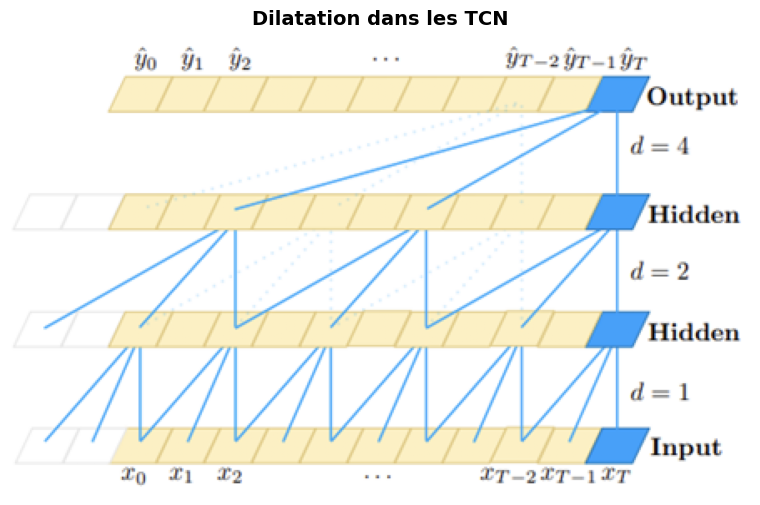

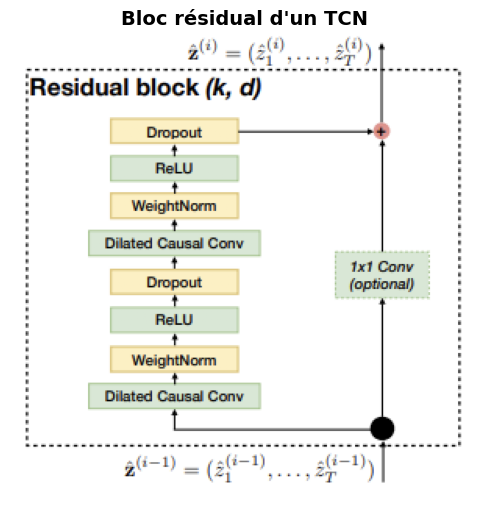

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement de l'image PNG
image = mpimg.imread('tcn_dilation.png')

# Affichage de l'image
plt.figure(figsize=(16, 6))
plt.imshow(image)
plt.axis('off')  # Masquer les axes pour un affichage plus propre
plt.title('Dilatation dans les TCN', fontsize=14, fontweight='bold')
plt.show()

# Chargement de l'image PNG
image = mpimg.imread('tcn_residual_block.png')

# Affichage de l'image
plt.figure(figsize=(16, 6))
plt.imshow(image)
plt.axis('off')  # Masquer les axes pour un affichage plus propre
plt.title('Bloc résidual d\'un TCN', fontsize=14, fontweight='bold')
plt.show()

---


## **Application: Prévision de données météo**


---

Le but de ce projet est de comparer trois architectures de réseaux de neurones (LSTM, GRU, TCN) pour la prévision météorologique horaire d’une journée en fonction des données historiques des 120 h précédentes. 

La prévision sera Multi Input Single Output (MISO) puisqu’elle présente de meilleurs résultats que la prévision Multi Input Multi Output (MIMO) (Hewage et al., 2021). Une fois entraîné, le modèle recevra donc en entrée trois caractéristiques météo (température ET humidité ET pression) pour les 120 h précédentes et devra ensuite prédire une caractéristique (température OU humidité OU pression) pour chacune des 24 h suivantes. 

Le processus peut ensuite répété pour obtenir la prévision de chacune des cinq caractéristiques étudiées. Le schéma d’entrée et de sortie des caractéristiques étudiées lors de la phase d’évaluation est représenté dans la figure suivante.

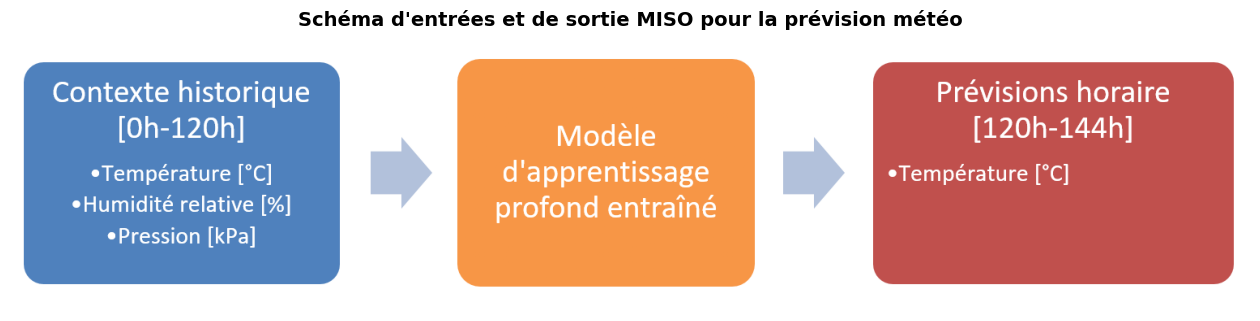

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement de l'image PNG
image = mpimg.imread('miso.png')

# Affichage de l'image
plt.figure(figsize=(16, 6))
plt.imshow(image)
plt.axis('off')  # Masquer les axes pour un affichage plus propre
plt.title('Schéma d\'entrées et de sortie MISO pour la prévision météo', fontsize=14, fontweight='bold')
plt.show()

---

**Données**

---

Les données pour ce projet proviennent de la base de données météorologique historique du gouvernement du Canada:
https://collaboration.cmc.ec.gc.ca/cmc/climate/Get_More_Data_Plus_de_donnees/
Celle-ci donne accès gratuitement aux données de toutes les stations météos publiques du Canada. 
Étant régies par les standards rigoureux de transport Canada, les stations météos aéroportuaires disposent des données les plus fiables et constantes. Il a donc été choisi d’utiliser les trois stations météos aéroportuaires de la région de Montréal pour ce projet.

-	MONTREAL/PIERRE ELLIOTT TRUDEAU INTL (ID 30165)
-	MONTREAL/ST-HUBERT (ID 48374)
-	MONTREAL MIRABEL INTL A (ID 49608)

Étant donné la nature cyclique de la météo (variations saisonnières et variations diurnes/nocturnes), le téléchargement des données de 2014 à 2021 a été effectuée. Cependant, afin d’accélérer les expériences, il a été choisi de garder seulement 20 k pas de temps soit environ 2.5 ans de données horaires. 


---

**Étapes**

---

Ce projet sera séparé en 4 étapes:
1) Préparation des données
2) Définition des modèles LSTM, GRU et TCN
3) Entrainement des modèles
4) Analyse des résultats


---

**1) Préparation des données**

---

Nous commencerons par définir la classe DataCleaner et les méthodes qui nous permettront de nettoyer et de préparer les données pour chaque station météo.

In [2]:
import pandas as pd
import os

# Initialize dataframe list and stations
stations = [30165,48374,49608]  # airport weather station ID
df_list = []
for station in stations:
    file_path = os.path.join(".",f"all_data_{station}_raw.pkl")
    df = pd.read_pickle(file_path)
    df = df.iloc[40000:60000,:] # Keep only 20k hourly time steps
    df_list.append(df)

In [3]:
# On commmence par analyser les dataframe
# Check for empty cells in the dataset
for station in range(len(stations)):
    print(50*"-")
    print(f"\nStation {stations[station]} dataframe")
    print(df_list[station].head())
    print(f"\nCheck for empty cells: {stations[station]}")
    print(df_list[station].isnull().any())

    # Calculate percentage of missing data
    missing_percentage = df_list[station].isnull().mean() * 100
    print("\nPercentage of missing data in each column:")
    print(missing_percentage)

--------------------------------------------------

Station 30165 dataframe
        Date/Time (LST)  Temp (degC)  Rel Hum (%)  Precip. Amount (mm)  \
40000  2018-12-23 16:00         -6.7         66.0                  0.0   
40001  2018-12-23 17:00         -7.4         70.0                  0.0   
40002  2018-12-23 18:00         -7.9         73.0                  0.0   
40003  2018-12-23 19:00         -9.2         80.0                  0.0   
40004  2018-12-23 20:00         -8.9         76.0                  0.0   

       Stn Press (kPa)  Wind Spd (km/h)  
40000           101.63              9.0  
40001           101.65              9.0  
40002           101.61              6.0  
40003           101.60              5.0  
40004           101.58              6.0  

Check for empty cells: 30165
Date/Time (LST)        False
Temp (degC)             True
Rel Hum (%)             True
Precip. Amount (mm)     True
Stn Press (kPa)         True
Wind Spd (km/h)         True
dtype: bool

Percentage

Les valeurs de **True** au empty cell check nous indique que nous avons des données manquantes dans notre jeu de données.
Ensuite, le pourcentage the valeurs manquantes nous indique la qualité des donnés pour chaque caractéristique.

Avec cette simple vérification, nous constatons que la quantité de données manquantes pour les précipitations est trop élevée pour les stations 48374 et 49608.
Il est donc mieux d'oublier cette caractéristique pour notre étude.

Pour simplifier d'avantage le problème, nous allons aussi laisser tomber la vitesse pour le problème.

In [4]:
for station in range(len(stations)):
    df_list[station] = df_list[station].drop(columns='Date/Time (LST)', errors='ignore')
    df_list[station] = df_list[station].drop(columns='Precip. Amount (mm)', errors='ignore')
    df_list[station] = df_list[station].drop(columns='Wind Spd (km/h)', errors='ignore')

Nous constatons qu'il y a encore des données manquantes.
Puisqu'il n'en manque pas énormément, nous pouvons forward fill les données.
Cela veut dire que s'il manque une donnée au temps $t$, nous lui affectons la donnée au temps $t-1$.

In [5]:
for station in range(len(stations)):
    df_list[station] = df_list[station].ffill()
    print(50*"-")
    print(f"\nStation {stations[station]} dataframe")
    print(df_list[station].head())
    print(f"\nCheck for empty cells: {stations[station]}")
    print(df_list[station].isnull().any())

    # Calculate percentage of missing data
    missing_percentage = df_list[station].isnull().mean() * 100
    print("\nPercentage of missing data in each column:")
    print(missing_percentage)


--------------------------------------------------

Station 30165 dataframe
       Temp (degC)  Rel Hum (%)  Stn Press (kPa)
40000         -6.7         66.0           101.63
40001         -7.4         70.0           101.65
40002         -7.9         73.0           101.61
40003         -9.2         80.0           101.60
40004         -8.9         76.0           101.58

Check for empty cells: 30165
Temp (degC)        False
Rel Hum (%)        False
Stn Press (kPa)    False
dtype: bool

Percentage of missing data in each column:
Temp (degC)        0.0
Rel Hum (%)        0.0
Stn Press (kPa)    0.0
dtype: float64
--------------------------------------------------

Station 48374 dataframe
       Temp (degC)  Rel Hum (%)  Stn Press (kPa)
40000         -7.1         74.0           101.70
40001         -8.1         76.0           101.71
40002         -7.9         76.0           101.68
40003         -8.8         81.0           101.69
40004         -9.4         86.0           101.67

Check for empt

Nous constatons maintenant que nos empty cells check sont tous à **False**.
Nos données sont maintenant nettoyées!

Nous pouvons regarder graphiquement à quoi ressemble nos données pour chaque station ci-bas.

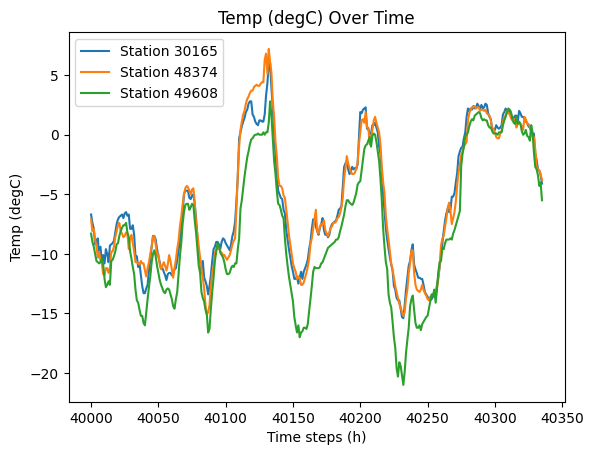

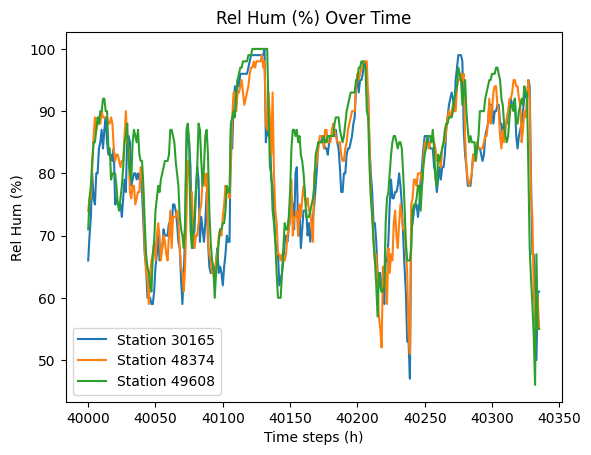

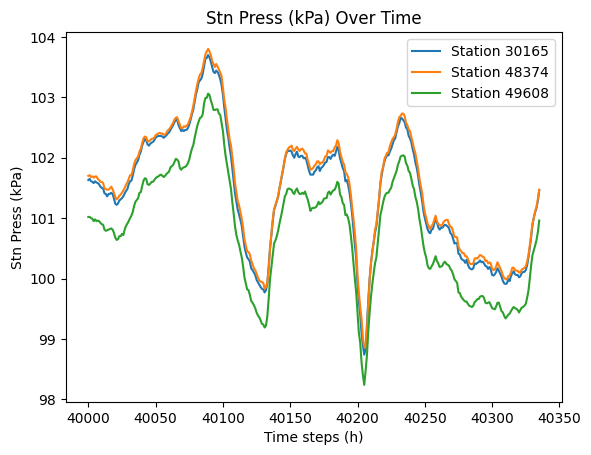

In [6]:
feature_list = ['Temp (degC)','Rel Hum (%)','Stn Press (kPa)']
stations = [30165,48374,49608]

# Plot
nb_timesteps = 24*14
for feature in range(3):
    feature = feature_list[feature]
    for index in range(3):
        plt.plot(df_list[index].index[:nb_timesteps], df_list[index][feature][:nb_timesteps], label=f'Station {stations[index]}')
    plt.xlabel('Time steps (h)')
    plt.ylabel(feature)
    plt.title(feature + ' Over Time')
    plt.legend()
    plt.show()

---

**2) Définition des modèles LSTM, GRU et TCN**

---

Nous allons maintenant définir les classes de chacun des modèles à l'aide de Pytorch.
Les LSTM et GRU sont simple à implémenter puisque Pytorch contient des templates pour ces 2 architectures.
Par contre, le TCN doit être défini explicitement.

In [7]:
import torch.nn as nn
import torch

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, dropout=0.2):
        super().__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_first = True

        # Unidirectional LSTM model with dropout
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=self.batch_first,
            dropout=dropout,
        )
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc_2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Initialize hidden state for each layer and batch
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # Propagate input through Unidirectional LSTM with dropout
        output, (hn, cn) = self.lstm(x, (h_0, c_0))

        # Reshape hidden states for Dense layer
        hn = hn.view(self.num_layers, -1, self.hidden_size)
        out = self.relu(hn[-1])  # take the output from the last layer
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc_2(out)

        return out

In [8]:
import torch.nn as nn
import torch

class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, dropout=0.2):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.batch_first = True

        # Unidirectional GRU model with dropout
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=self.batch_first,
            dropout=dropout,
        )
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc_2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Initialize hidden state for each layer and batch
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # Propagate input through Unidirectional GRU with dropout
        output, h_n = self.gru(x, h_0)

        # Reshape hidden states for Dense layer
        h_n = h_n.view(self.num_layers, -1, self.hidden_size)
        out = self.relu(h_n[-1])  # take the output from the last layer
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc_2(out)

        return out


In [9]:
import torch.nn as nn
from torch.nn.utils.parametrizations import weight_norm

# For original implementation: https://github.com/locuslab/TCN/blob/master/TCN/

class Crop(nn.Module):
    # Class used for padding time-series in the causal convolution operation

    def __init__(self, crop_size):
        super(Crop, self).__init__()
        self.crop_size = crop_size

    def forward(self, x):
        return x[:, :, :-self.crop_size].contiguous()


class TemporalCausalLayer(nn.Module):
    # Implementation of a temporal causal layer

    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout = 0.2):
        super(TemporalCausalLayer, self).__init__()
        padding = (kernel_size - 1) * dilation
        conv_params = {
            'kernel_size': kernel_size,
            'stride':      stride,
            'padding':     padding,
            'dilation':    dilation
        }

        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
        self.crop1 = Crop(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
        self.crop2 = Crop(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.crop1, self.relu1, self.dropout1,
                                 self.conv2, self.crop2, self.relu2, self.dropout2)

        self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()

    def forward(self, x):
        y = self.net(x)
        b = x if self.bias is None else self.bias(x)
        return self.relu(y + b)


class TemporalConvolutionNetwork(nn.Module):
    # Implementation of TCN with stack of TC layers and introducing dilation

    def __init__(self, num_inputs, num_channels, kernel_size = 2, dropout = 0.2, dilation = 2):
        super(TemporalConvolutionNetwork, self).__init__()
        layers = []
        num_levels = len(num_channels)
        dilation_rate = dilation
        tcl_param = {
            'kernel_size': kernel_size,
            'stride':      1,
            'dropout':     dropout
        }
        for i in range(num_levels):
            dilation = dilation_rate**i
            in_ch = num_inputs if i == 0 else num_channels[i - 1]
            out_ch = num_channels[i]
            tcl_param['dilation'] = dilation
            tcl = TemporalCausalLayer(in_ch, out_ch, **tcl_param)
            layers.append(tcl)

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


class TCN(nn.Module):

    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout, dilation):
        super(TCN, self).__init__()
        self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size = kernel_size, dropout = dropout, dilation = dilation)
        self.linear = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x)
        return self.linear(y[:, :, -1])


---

**3) Entrainement**

---

Nous allons maintenant entrainer chacun des modèles pour faire la prédiction de la température seulement.

Les variables peuvent être modifiées pour prédire autres caractéristiques météo.

Nous devons d'abord définir la fonction split_sequences qui s'occupe de créer nos sliding windows.


In [10]:
import numpy as np

def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    """
    Splits a multivariate input sequence into past and future samples.
    Creates a dataset of sliding windows.
    Inputs:
        input_sequences   : multivariate sequence inputed (x)
        output_sequence   : multivariate sequence outputed (y)
        n_steps_in        : number of time steps to look back
        n_steps_out       : number of time steps to look in the future
    Outputs:
        x:  input array with shape (Total time steps - n_steps_in - n_steps_out + 2, n_steps_in, nb features)
        y:  output array with shape (Total time steps - n_steps_in - n_steps_out + 2, n_steps_out)
    """

    X, y = list(), list() # instantiate X and y

    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix]
        X.append(seq_x), y.append(seq_y)

    return np.array(X), np.array(y)

Nous choisisons ensuite quel caractéristique météo nous voulons prédire et pour quelle station.

STATION_FORECASTED = 0 indique que nous voulons prédire pour la station 30165 soit MONTREAL/PIERRE ELLIOTT TRUDEAU INTL.

FEATURE_FORECASTED = 0 indique que nous voulons prédire la température.

Nous définissons aussi le contexte à fournir au modèle soit 120h et le nombre d'heures à prédire de 24h.

In [ ]:
# Station and feature that we want to forecast
stations = [30165,48374,49608]
STATION_FORECASTED = 0
feature_list = ['Temp (degC)','Rel Hum (%)','Stn Press (kPa)']
FEATURE_FORECASTED = 0
selected_feature = len(feature_list)*STATION_FORECASTED+FEATURE_FORECASTED
num_features = len(stations) * len(feature_list)

# Context and forecast length# 
TS_PAST     = 120   # Time steps to look into the past (context) [h]
TS_FUTURE   = 24    # Time steps to look into the future (forecast) [h]

Nous devons finalement préparer les tensors requis pour l'entrainement.

Les 20k time steps du dataset seront séparés en 3 sous ensembles de cette façon:
- Ensemble d'entrainement (70%)
- Ensemble de validation (15%)
- Ensemble de test (15%)

In [ ]:
# Concatenate data from all 3 weather stations to a single 1
df = pd.concat(df_list,axis=1) # shape goes from 3*(20k,3) to (20k,9)

# Preprocessing data with z-score normalization
z_mean = df.mean()
z_std = df.std()
df = (df - z_mean) / z_std

# Feed context and prediction results to the model (adding another dimension)
x_arr,y_arr = split_sequences(df,df.iloc[:,selected_feature],TS_PAST, TS_FUTURE)

# Datasplit properties
frac_train  = 0.7
frac_val    = 0.15
num_samples = x_arr.shape[0]
num_train   = int(frac_train * num_samples)
num_val     = int(frac_val * num_samples)
num_test    = num_samples - num_train - num_val

# Split the data into train/validate/test
x_arr_train = x_arr[:num_train, :, :]
x_arr_val   = x_arr[num_train:num_train + num_val, :, :]
x_arr_test  = x_arr[num_train + num_val:, :, :]
print(f"\nx_arr shapes:\n{x_arr_train.shape}\n{x_arr_val.shape}\n{x_arr_test.shape}")
y_arr_train = y_arr[:num_train, :]
y_arr_val   = y_arr[num_train:num_train + num_val, :]
y_arr_test  = y_arr[num_train + num_val:, :]
print(f"\ny_arr shapes:\n{y_arr_train.shape}\n{y_arr_val.shape}\n{y_arr_test.shape}")

# We want to feed 120 samples and predict the next 24 for 15 different features
# Tensor shape sould be x_train(12264,120,15) and y_train(12264,24)
# x[TS batch size,TS context, num features] and y[TS batch size,TS forecast]
x_train = torch.tensor(x_arr_train, dtype=torch.float32)
x_val   = torch.tensor(x_arr_val, dtype=torch.float32)
x_test  = torch.tensor(x_arr_test, dtype=torch.float32)
y_train = torch.tensor(y_arr_train, dtype=torch.float32)
y_val   = torch.tensor(y_arr_val, dtype=torch.float32)
y_test  = torch.tensor(y_arr_test, dtype=torch.float32)
train_len = x_train.size()[0]
print(f"\nTensor shapes (x):\n{x_train.shape}\n{x_val.shape}\n{x_test.shape}")
print(f"\nTensor shapes (y):\n{y_train.shape}\n{y_val.shape}\n{y_test.shape}\n")


---

**3.1) Entrainement LSTM**

---

In [12]:
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pandas as pd
import time

# NN parameters and hyperparameters
chosen_model = "LSTM"               # Choose which model structure to use
epochs = 150                        # Training epochs
dropout = .0                        # Dropout
learning_rate = 0.005               # Learning rate
num_classes =   TS_FUTURE
input_size = num_features
hidden_size = 64
num_layers = 1
output_dim = TS_FUTURE

# Initialize model
model_params = {
        'num_classes':  num_classes,
        'input_size':   input_size,
        'hidden_size':  hidden_size,
        'num_layers':   num_layers,
        'dropout':      dropout,
    }
model = LSTM(**model_params)
print(model)

# Define optimizer and loss functions
optimizer   = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
mse_loss    = torch.nn.MSELoss()


LSTM(
  (lstm): LSTM(9, 64, batch_first=True)
  (fc_1): Linear(in_features=64, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=24, bias=True)
  (relu): ReLU()
)


In [75]:
# Record the start time
start_time = time.time()
last_print_time = start_time

# Training
best_params     = None
min_val_loss    = sys.maxsize

training_loss = []
validation_loss = []

# Begin training
for epoch in range(epochs):

    # Calculate training loss
    prediction = model(x_train)
    loss = mse_loss(prediction, y_train)

    optimizer.zero_grad()   # Calculate gradient, manually setting to 0
    loss.backward()         # Calculate loss from loss function
    optimizer.step()        # Improve from loss (backprop)

    # Calculate validation loss
    val_prediction = model(x_val)
    val_loss = mse_loss(val_prediction, y_val)

    # Append losses to loss list
    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())
    
    # Copy current epoch param if they're the best yet
    if val_loss.item() < min_val_loss:
        best_params = copy.deepcopy(model.state_dict())
        min_val_loss = val_loss.item()

    # Print results for every 10th epoc
    if epoch % 10 == 0:
        current_time = time.time()
        time_since_last_print = current_time - last_print_time
        last_print_time = current_time  # Update the last print time
        
        print(f'epoch {epoch}. train: {round(loss.item(), 4)}, '
              f'val: {round(val_loss.item(), 4)}, '
              f'time since last print: {round(time_since_last_print, 2)} sec')

# Record the end time
end_time = time.time()


epoch 0. train: 1.0689, val: 0.7162
epoch 10. train: 0.2717, val: 0.2843
epoch 20. train: 0.1463, val: 0.119
epoch 30. train: 0.1159, val: 0.1065
epoch 40. train: 0.1084, val: 0.1029
epoch 50. train: 0.1008, val: 0.0968
epoch 60. train: 0.0956, val: 0.0931
epoch 70. train: 0.0899, val: 0.0892
epoch 80. train: 0.0828, val: 0.0828
epoch 90. train: 0.0765, val: 0.0804
epoch 100. train: 0.0707, val: 0.0766
epoch 110. train: 0.0654, val: 0.0743
epoch 120. train: 0.0613, val: 0.0721
epoch 130. train: 0.0596, val: 0.0697
epoch 140. train: 0.0566, val: 0.0686


Execution time: 938.3 seconds


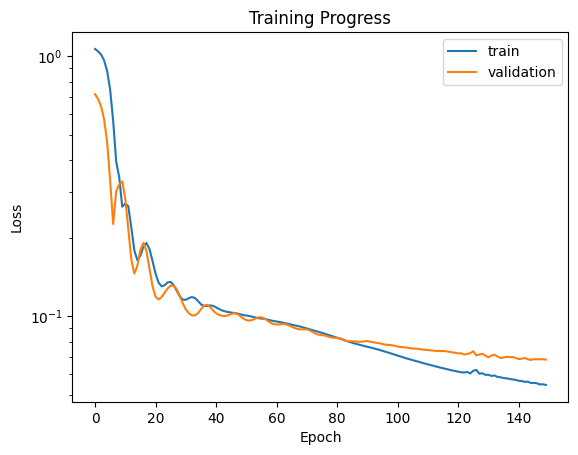

LSTM MSE loss: 0.0759
LSTM MAE loss: 0.20200000703334808
LSTM R^2 score: 0.765


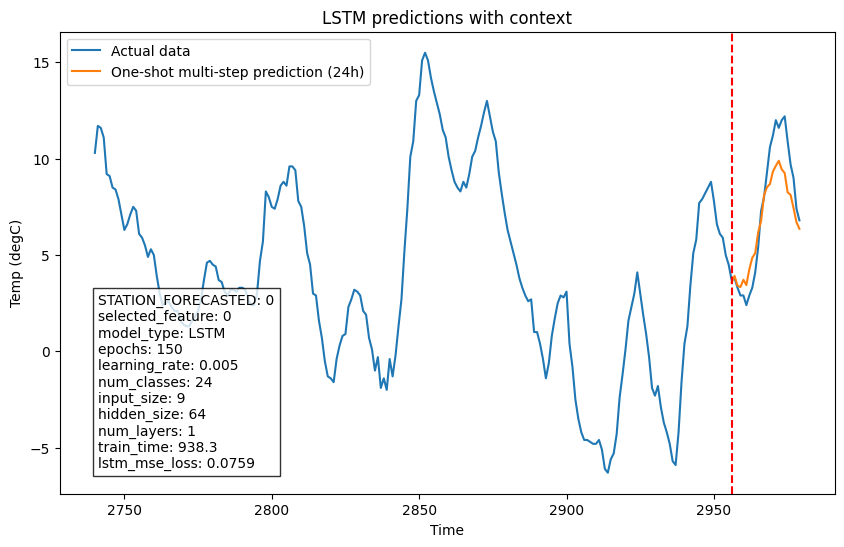

In [87]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the elapsed time
train_time = round(end_time - start_time,1)
print(f"Execution time: {train_time} seconds")

# Training progress
plt.title('Training Progress')
plt.yscale("log")
plt.plot(training_loss, label = 'train')
plt.plot(validation_loss, label = 'validation')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Load best trained model
best_model = LSTM(**model_params)
best_model.load_state_dict(best_params)
torch.save(best_model,'lstm_trained_model_' + str(FEATURE_FORECASTED) + '.pt')
best_model.eval()

# Calculate test loss
mse_loss            = torch.nn.MSELoss()
model_prediction    = best_model(x_test)
model_mse_loss      = round(mse_loss(model_prediction, y_test).item(), 4)
mae_loss            = mean_absolute_error(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_mae_loss      = round(mae_loss, 4)
r2_loss             = r2_score(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_r2_loss       = round(r2_loss, 4)
print(f"{chosen_model} MSE loss: {model_mse_loss}")
print(f"{chosen_model} MAE loss: {model_mae_loss}")
print(f"{chosen_model} R^2 score: {model_r2_loss}")

# Test model
lstm_prediction = best_model(x_test[-1].unsqueeze(0))
lstm_prediction = lstm_prediction.detach().numpy()
lstm_prediction = lstm_prediction * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]    # Remove z-score normalization
lstm_prediction = lstm_prediction[0].tolist()

# Test target
test_target = y_arr_test[-1,:]
test_target = test_target * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
test_target = test_target.tolist()

params_dict = {'STATION_FORECASTED': STATION_FORECASTED,
           'selected_feature': selected_feature,
           'model_type' : chosen_model,
           'epochs': epochs,
           'learning_rate': learning_rate,
           'num_classes':   num_classes,
           'input_size':  input_size,
           'hidden_size': hidden_size,
           'num_layers':  num_layers,
           'train_time' : train_time,
           'lstm_mse_loss': model_mse_loss}

# Plot prediction and context
plt.figure(figsize=(10,6)) #plotting
plt.title('LSTM predictions with context')
start_plot = len(y_arr_test) - 2*TS_PAST
y = df.iloc[:,selected_feature]
y = y[-len(y_arr_test):]
y = y * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
a = [x for x in range(start_plot, len(y))]
plt.plot(a, y[start_plot:], label='Actual data')
c = [x for x in range(len(y)-TS_FUTURE, len(y))]
plt.plot(c, lstm_prediction, label=f'One-shot multi-step prediction ({TS_FUTURE}h)')
plt.axvline(x=len(y)-TS_FUTURE, c='r', linestyle='--')
plt.ylabel(f"{feature_list[selected_feature%5]}")
plt.xlabel("Time")
plt.legend(loc='upper left')
text_content = '\n'.join([f'{key}: {value}' for key, value in params_dict.items()])
plt.text(0.05, 0.05, text_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='bottom', horizontalalignment='left')
plt.show()

---

**3.2) Entrainement GRU**

---

In [13]:
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pandas as pd
import time

# NN parameters and hyperparameters
chosen_model = "GRU"               # Choose which model structure to use
epochs = 150                        # Training epochs
dropout = .0                        # Dropout
learning_rate = 0.005               # Learning rate
num_classes =   TS_FUTURE
input_size = num_features
hidden_size = 32
num_layers = 1
output_dim = TS_FUTURE

# Initialize model
model_params = {
        'num_classes':  num_classes,
        'input_size':   input_size,
        'hidden_size':  hidden_size,
        'num_layers':   num_layers,
        'dropout':      dropout,
    }
model = GRU(**model_params)
print(model)

# Define optimizer and loss functions
optimizer   = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
mse_loss    = torch.nn.MSELoss()


GRU(
  (gru): GRU(9, 32, batch_first=True)
  (fc_1): Linear(in_features=32, out_features=128, bias=True)
  (fc_2): Linear(in_features=128, out_features=24, bias=True)
  (relu): ReLU()
)


In [14]:
# Record the start time
start_time = time.time()
last_print_time = start_time

# Training
best_params     = None
min_val_loss    = sys.maxsize

training_loss = []
validation_loss = []

# Begin training
for epoch in range(epochs):

    # Calculate training loss
    prediction = model(x_train)
    loss = mse_loss(prediction, y_train)

    optimizer.zero_grad()   # Calculate gradient, manually setting to 0
    loss.backward()         # Calculate loss from loss function
    optimizer.step()        # Improve from loss (backprop)

    # Calculate validation loss
    val_prediction = model(x_val)
    val_loss = mse_loss(val_prediction, y_val)

    # Append losses to loss list
    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())
    
    # Copy current epoch param if they're the best yet
    if val_loss.item() < min_val_loss:
        best_params = copy.deepcopy(model.state_dict())
        min_val_loss = val_loss.item()

    # Print results for every 10th epoc
    if epoch % 10 == 0:
        current_time = time.time()
        time_since_last_print = current_time - last_print_time
        last_print_time = current_time  # Update the last print time
        
        print(f'epoch {epoch}. train: {round(loss.item(), 4)}, '
              f'val: {round(val_loss.item(), 4)}, '
              f'time since last print: {round(time_since_last_print, 2)} sec')

# Record the end time
end_time = time.time()

epoch 0. train: 1.0681, val: 0.696, time since last print: 7.09 sec
epoch 10. train: 0.2431, val: 0.3203, time since last print: 20.33 sec
epoch 20. train: 0.1804, val: 0.1441, time since last print: 19.03 sec
epoch 30. train: 0.1269, val: 0.1234, time since last print: 18.7 sec
epoch 40. train: 0.1059, val: 0.1071, time since last print: 18.99 sec
epoch 50. train: 0.0985, val: 0.0966, time since last print: 19.28 sec
epoch 60. train: 0.0908, val: 0.09, time since last print: 19.29 sec
epoch 70. train: 0.0849, val: 0.0854, time since last print: 19.25 sec
epoch 80. train: 0.0799, val: 0.0824, time since last print: 19.77 sec
epoch 90. train: 0.0763, val: 0.0802, time since last print: 19.3 sec
epoch 100. train: 0.073, val: 0.0784, time since last print: 18.83 sec
epoch 110. train: 0.0696, val: 0.0762, time since last print: 19.5 sec
epoch 120. train: 0.0666, val: 0.0749, time since last print: 19.09 sec
epoch 130. train: 0.0643, val: 0.0744, time since last print: 19.38 sec
epoch 140. 

Execution time: 296.6 seconds


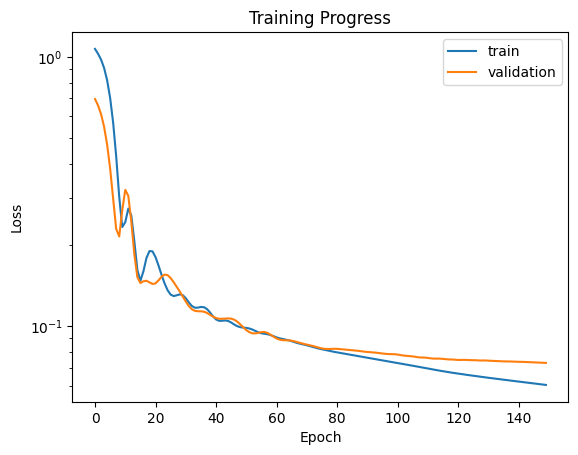

GRU MSE loss: 0.0827
GRU MAE loss: 0.21150000393390656
GRU R^2 score: 0.7436


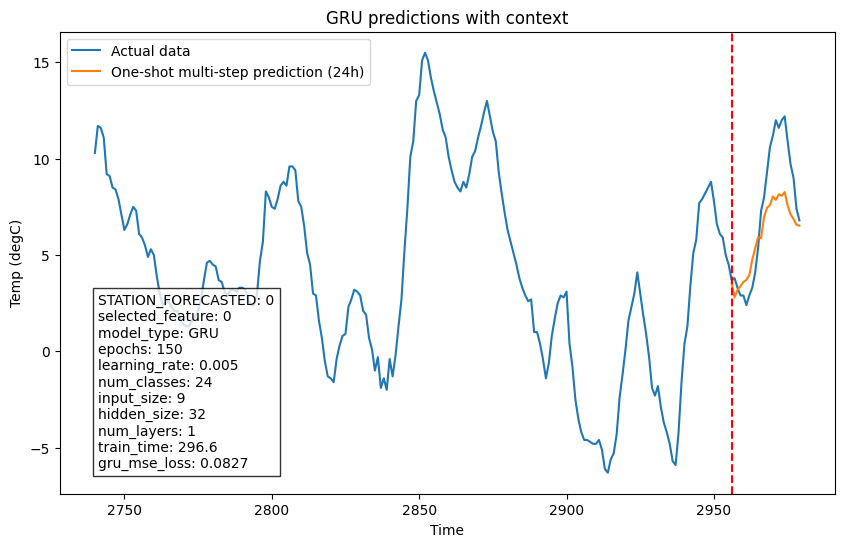

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the elapsed time
train_time = round(end_time - start_time,1)
print(f"Execution time: {train_time} seconds")

# Training progress
plt.title('Training Progress')
plt.yscale("log")
plt.plot(training_loss, label = 'train')
plt.plot(validation_loss, label = 'validation')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Load best trained model
best_model = GRU(**model_params)
best_model.load_state_dict(best_params)
torch.save(best_model,'gru_trained_model_' + str(FEATURE_FORECASTED) + '.pt')
best_model.eval()

# Calculate test loss
mse_loss            = torch.nn.MSELoss()
model_prediction    = best_model(x_test)
model_mse_loss      = round(mse_loss(model_prediction, y_test).item(), 4)
mae_loss            = mean_absolute_error(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_mae_loss      = round(mae_loss, 4)
r2_loss             = r2_score(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_r2_loss       = round(r2_loss, 4)
print(f"{chosen_model} MSE loss: {model_mse_loss}")
print(f"{chosen_model} MAE loss: {model_mae_loss}")
print(f"{chosen_model} R^2 score: {model_r2_loss}")

# Test model
gru_prediction = best_model(x_test[-1].unsqueeze(0))
gru_prediction = gru_prediction.detach().numpy()
gru_prediction = gru_prediction * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]    # Remove z-score normalization
gru_prediction = gru_prediction[0].tolist()

# Test target
test_target = y_arr_test[-1,:]
test_target = test_target * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
test_target = test_target.tolist()

params_dict = {'STATION_FORECASTED': STATION_FORECASTED,
           'selected_feature': selected_feature,
           'model_type' : chosen_model,
           'epochs': epochs,
           'learning_rate': learning_rate,
           'num_classes':   num_classes,
           'input_size':  input_size,
           'hidden_size': hidden_size,
           'num_layers':  num_layers,
           'train_time' : train_time,
           'gru_mse_loss': model_mse_loss}

# Plot prediction and context
plt.figure(figsize=(10,6)) #plotting
plt.title('GRU predictions with context')
start_plot = len(y_arr_test) - 2*TS_PAST
y = df.iloc[:,selected_feature]
y = y[-len(y_arr_test):]
y = y * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
a = [x for x in range(start_plot, len(y))]
plt.plot(a, y[start_plot:], label='Actual data')
c = [x for x in range(len(y)-TS_FUTURE, len(y))]
plt.plot(c, gru_prediction, label=f'One-shot multi-step prediction ({TS_FUTURE}h)')
plt.axvline(x=len(y)-TS_FUTURE, c='r', linestyle='--')
plt.ylabel(f"{feature_list[selected_feature%5]}")
plt.xlabel("Time")
plt.legend(loc='upper left')
text_content = '\n'.join([f'{key}: {value}' for key, value in params_dict.items()])
plt.text(0.05, 0.05, text_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='bottom', horizontalalignment='left')
plt.show()

---

**3.3) Entrainement TCN**

---

In [20]:
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pandas as pd
import time

# Global nn parameters
epochs = 300                        # Training epochs
input_size = TS_PAST                # Context
output_size = TS_FUTURE             # Forecast
channel_sizes = [num_features]*3    # Temporal causal layer channels [num of features]*amount of filters per layer
kernel_size = 4                     # Convolution kernel size
dropout = .4                        # Dropout
dilation = 2                        # Dilation rate
learning_rate = 0.005               # Learning rate

# Initialize model
model_params = {
    'input_size':   input_size,
    'output_size':  output_size,
    'num_channels': channel_sizes,
    'kernel_size':  kernel_size,
    'dropout':      dropout,
    'dilation':     dilation
}
model = TCN(**model_params)
print(model)

# Define optimizer and loss functions
optimizer   = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
mse_loss    = torch.nn.MSELoss()

TCN(
  (tcn): TemporalConvolutionNetwork(
    (network): Sequential(
      (0): TemporalCausalLayer(
        (conv1): ParametrizedConv1d(
          120, 9, kernel_size=(4,), stride=(1,), padding=(3,)
          (parametrizations): ModuleDict(
            (weight): ParametrizationList(
              (0): _WeightNorm()
            )
          )
        )
        (crop1): Crop()
        (relu1): ReLU()
        (dropout1): Dropout(p=0.4, inplace=False)
        (conv2): ParametrizedConv1d(
          9, 9, kernel_size=(4,), stride=(1,), padding=(3,)
          (parametrizations): ModuleDict(
            (weight): ParametrizationList(
              (0): _WeightNorm()
            )
          )
        )
        (crop2): Crop()
        (relu2): ReLU()
        (dropout2): Dropout(p=0.4, inplace=False)
        (net): Sequential(
          (0): ParametrizedConv1d(
            120, 9, kernel_size=(4,), stride=(1,), padding=(3,)
            (parametrizations): ModuleDict(
              (weight): Param

In [21]:
# Record the start time
start_time = time.time()
last_print_time = start_time

# Training
best_params     = None
min_val_loss    = sys.maxsize

training_loss = []
validation_loss = []

# Begin training
for epoch in range(epochs):

    # Calculate training loss
    prediction = model(x_train)
    loss = mse_loss(prediction, y_train)

    optimizer.zero_grad()   # Calculate gradient, manually setting to 0
    loss.backward()         # Calculate loss from loss function
    optimizer.step()        # Improve from loss (backprop)

    # Calculate validation loss
    val_prediction = model(x_val)
    val_loss = mse_loss(val_prediction, y_val)

    # Append losses to loss list
    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())
    
    # Copy current epoch param if they're the best yet
    if val_loss.item() < min_val_loss:
        best_params = copy.deepcopy(model.state_dict())
        min_val_loss = val_loss.item()

    # Print results for every 10th epoc
    if epoch % 10 == 0:
        current_time = time.time()
        time_since_last_print = current_time - last_print_time
        last_print_time = current_time  # Update the last print time
        
        print(f'epoch {epoch}. train: {round(loss.item(), 4)}, '
              f'val: {round(val_loss.item(), 4)}, '
              f'time since last print: {round(time_since_last_print, 2)} sec')

# Record the end time
end_time = time.time()

epoch 0. train: 1.2218, val: 0.8794, time since last print: 0.27 sec
epoch 10. train: 0.8998, val: 0.7096, time since last print: 2.55 sec
epoch 20. train: 0.6014, val: 0.4412, time since last print: 2.5 sec
epoch 30. train: 0.3643, val: 0.2656, time since last print: 2.64 sec
epoch 40. train: 0.2719, val: 0.1974, time since last print: 2.61 sec
epoch 50. train: 0.2232, val: 0.1785, time since last print: 2.44 sec
epoch 60. train: 0.1995, val: 0.1648, time since last print: 2.4 sec
epoch 70. train: 0.1821, val: 0.1522, time since last print: 2.42 sec
epoch 80. train: 0.1692, val: 0.1449, time since last print: 2.43 sec
epoch 90. train: 0.1582, val: 0.137, time since last print: 2.42 sec
epoch 100. train: 0.1496, val: 0.1313, time since last print: 2.45 sec
epoch 110. train: 0.1428, val: 0.1259, time since last print: 2.47 sec
epoch 120. train: 0.1357, val: 0.1246, time since last print: 2.46 sec
epoch 130. train: 0.1286, val: 0.1188, time since last print: 2.47 sec
epoch 140. train: 0.

Execution time: 75.6 seconds


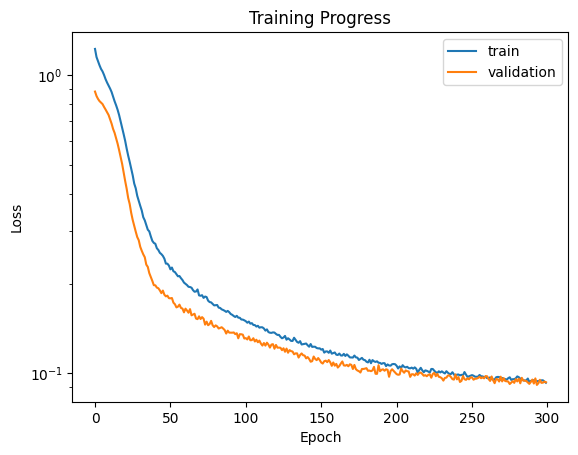

GRU MSE loss: 0.0857
GRU MAE loss: 0.21690000593662262
GRU R^2 score: 0.7345


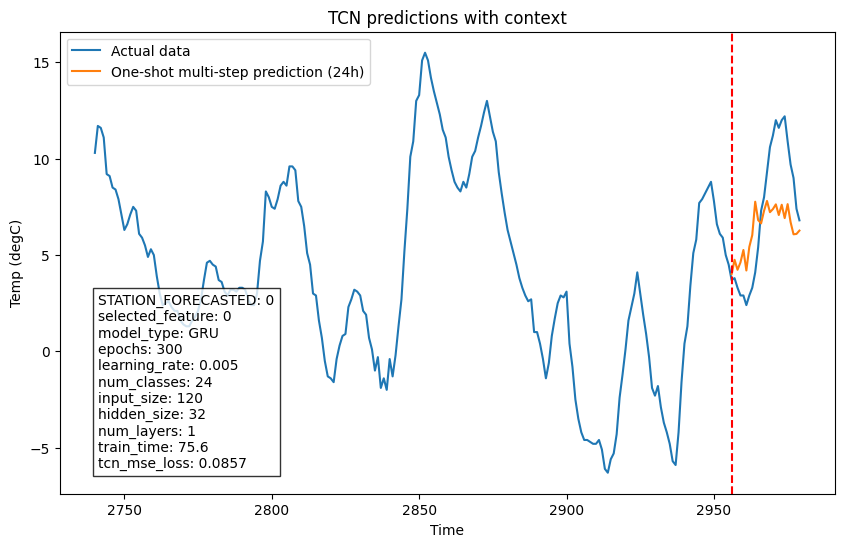

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the elapsed time
train_time = round(end_time - start_time,1)
print(f"Execution time: {train_time} seconds")

# Training progress
plt.title('Training Progress')
plt.yscale("log")
plt.plot(training_loss, label = 'train')
plt.plot(validation_loss, label = 'validation')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Load best trained model
best_model = TCN(**model_params)
best_model.load_state_dict(best_params)
torch.save(best_model.state_dict(), 'tcn_trained_model_' + str(FEATURE_FORECASTED) + '.pt')
best_model.eval()

# Calculate test loss
mse_loss            = torch.nn.MSELoss()
model_prediction    = best_model(x_test)
model_mse_loss      = round(mse_loss(model_prediction, y_test).item(), 4)
mae_loss            = mean_absolute_error(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_mae_loss      = round(mae_loss, 4)
r2_loss             = r2_score(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
model_r2_loss       = round(r2_loss, 4)
print(f"{chosen_model} MSE loss: {model_mse_loss}")
print(f"{chosen_model} MAE loss: {model_mae_loss}")
print(f"{chosen_model} R^2 score: {model_r2_loss}")

# Test model
tcn_prediction = best_model(x_test[-1].unsqueeze(0))
tcn_prediction = tcn_prediction.detach().numpy()
tcn_prediction = tcn_prediction * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]    # Remove z-score normalization
tcn_prediction = tcn_prediction[0].tolist()

# Test target
test_target = y_arr_test[-1,:]
test_target = test_target * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
test_target = test_target.tolist()

params_dict = {'STATION_FORECASTED': STATION_FORECASTED,
           'selected_feature': selected_feature,
           'model_type' : chosen_model,
           'epochs': epochs,
           'learning_rate': learning_rate,
           'num_classes':   num_classes,
           'input_size':  input_size,
           'hidden_size': hidden_size,
           'num_layers':  num_layers,
           'train_time' : train_time,
           'tcn_mse_loss': model_mse_loss}

# Plot prediction and context
plt.figure(figsize=(10,6)) #plotting
plt.title('TCN predictions with context')
start_plot = len(y_arr_test) - 2*TS_PAST
y = df.iloc[:,selected_feature]
y = y[-len(y_arr_test):]
y = y * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
a = [x for x in range(start_plot, len(y))]
plt.plot(a, y[start_plot:], label='Actual data')
c = [x for x in range(len(y)-TS_FUTURE, len(y))]
plt.plot(c, tcn_prediction, label=f'One-shot multi-step prediction ({TS_FUTURE}h)')
plt.axvline(x=len(y)-TS_FUTURE, c='r', linestyle='--')
plt.ylabel(f"{feature_list[selected_feature%5]}")
plt.xlabel("Time")
plt.legend(loc='upper left')
text_content = '\n'.join([f'{key}: {value}' for key, value in params_dict.items()])
plt.text(0.05, 0.05, text_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='bottom', horizontalalignment='left')
plt.show()

---

**4) Analyse des résultats**

---

Nous souhaitons d'abord superposer la prédiction de chacun des modèles sur le même graphique.

TCN MSE : 0.0857
TCN MAE : 0.21690000593662262
TCN R^2 score: 0.7345
LSTM MSE : 0.0759
LSTM MAE : 0.20200000703334808
LSTM R^2 score: 0.765
GRU MSE : 0.0827
GRU MAE : 0.21150000393390656
GRU R^2 score: 0.7436


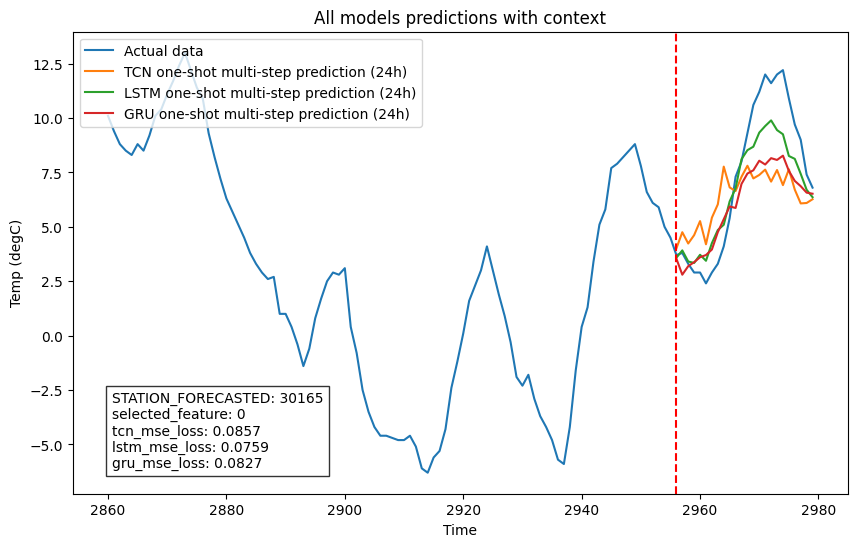

In [24]:
# Choose model
model_list = ['TCN','LSTM','GRU']
chosen_models = model_list[0:3]
model_predictions = []
mse_losses = np.full(3, np.nan).tolist()

# Loop through each evaluated model
for chosen_model in chosen_models:
    # Load model
    if chosen_model == 'TCN':
        # Global nn parameters
        epochs = 300                        # Training epochs
        input_size = TS_PAST                # Context
        output_size = TS_FUTURE             # Forecast
        channel_sizes = [num_features]*3    # Temporal causal layer channels [num of features]*amount of filters per layer
        kernel_size = 4                     # Convolution kernel size
        dropout = .4                        # Dropout
        dilation = 2                        # Dilation rate
        learning_rate = 0.005               # Learning rate

        model_params = {
            'input_size':   input_size,
            'output_size':  output_size,
            'num_channels': channel_sizes,
            'kernel_size':  kernel_size,
            'dropout':      dropout,
            'dilation':     dilation
        }
        # Load the saved state_dict into the model
        best_model = TCN(**model_params)
        best_model.load_state_dict(torch.load('tcn_trained_model_' + str(FEATURE_FORECASTED) + '.pt'))
        best_model.eval()

    else:
        model_path = str.lower(chosen_model) + '_trained_model_' + str(selected_feature) + '.pt'
        best_model = torch.load(model_path)
        best_model.eval()

    # Calculate MSE, MAE and R^2 score
    mse_loss            = torch.nn.MSELoss()
    model_prediction    = best_model(x_test)
    model_mse_loss      = round(mse_loss(model_prediction, y_test).item(), 4)
    mae_loss            = mean_absolute_error(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
    model_mae_loss      = round(mae_loss, 4)
    r2_loss             = r2_score(y_test.cpu().detach().numpy(), model_prediction.cpu().detach().numpy())
    model_r2_loss       = round(r2_loss, 4)
    print(f"{chosen_model} MSE : {model_mse_loss}")
    print(f"{chosen_model} MAE : {model_mae_loss}")
    print(f"{chosen_model} R^2 score: {model_r2_loss}")

    # Test model
    model_prediction = best_model(x_test[-1].unsqueeze(0))
    model_prediction = model_prediction.detach().numpy()
    model_prediction = model_prediction * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]    # Remove z-score normalization
    model_prediction = model_prediction[0].tolist()

    # Add to prediction and losses to list
    model_predictions.append(model_prediction)
    mse_losses[model_list.index(chosen_model)] = (model_mse_loss)

# Test target
test_target = y_arr_test[-1,:]
test_target = test_target * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
test_target = test_target.tolist()

# Plot prediction and context
plt.figure(figsize=(10,6))
plt.title('All models predictions with context')
start_plot = len(y_arr_test) - 1*TS_PAST
y = df.iloc[:,selected_feature]
y = y[-len(y_arr_test):]
y = y * z_std.iloc[selected_feature] + z_mean.iloc[selected_feature]  # Remove z-score normalization
a = [x for x in range(start_plot, len(y))]
plt.plot(a, y[start_plot:], label='Actual data')
c = [x for x in range(len(y)-TS_FUTURE, len(y))]
for i in range(len(model_predictions)):
    plt.plot(c, model_predictions[i], label=f'{chosen_models[i]} one-shot multi-step prediction ({TS_FUTURE}h)')
plt.axvline(x=len(y)-TS_FUTURE, c='r', linestyle='--')
plt.ylabel(f"{feature_list[selected_feature%5]}")
plt.xlabel("Time")
plt.legend(loc='upper left')
# Add parameters as text box in plot
text = {'STATION_FORECASTED': stations[STATION_FORECASTED],
           'selected_feature': selected_feature,
           'tcn_mse_loss': mse_losses[0],
           'lstm_mse_loss': mse_losses[1],
           'gru_mse_loss': mse_losses[2]}
text_content = '\n'.join([f'{key}: {value}' for key, value in text.items()])
plt.text(0.05, 0.05, text_content, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), verticalalignment='bottom', horizontalalignment='left')
plt.show()

À noter que les erreurs sont calculées sur toutes les prédictions du sliding window, pas seulement celle illustrée sur le graphique.

Nous constatons d'abord que le LSTM obtient l'erreur la plus basse avec un MSE=0.0759.
Cependant, les deux autres modèles ne sont pas si loin derrière.

Malgré que le LSTM performe mieux, il est toujours important en machine learning de considérer le coût associé à chaque méthode.
Si nous regardons les temps approximatifs requis pour entrainer les modèles, nous constatons que le LSTM est bien plus coûteux que les deux autres.

Temps d'entraînement approximatif sur un laptop:

LSTM $\approx 15$ min 

GRU $\approx 5$ min 

TCN $\approx 1.25$ min 

Pour une application réelle, un choix doit donc être fait entre précision et coût.

Finalement, nous constatons que les erreurs demeurent élevés pour chaque modèle.
Cela est de plus confirmé par la prédiction graphique qui n'est pas très précise.
Cet exemple simple démontre comment certains phénomènes sont très difficiles à capturer et de simple modèle de deep learning ne peuvent pas prédire précisément ce genre de problème.

Il reste néanmoins que l'IA présente une alternative très intéressante notamment pour la prédiction météo.
Google et Microsoft ont d'ailleurs développés des modèles météos basés sur le deep learning qui performent mieux que les méthodes traditionnelles sur plusieurs aspects.

Google GraphCast: https://deepmind.google/discover/blog/graphcast-ai-model-for-faster-and-more-accurate-global-weather-forecasting/

Microsoft Aurora: https://www.microsoft.com/en-us/research/blog/introducing-aurora-the-first-large-scale-foundation-model-of-the-atmosphere/

---

**FIN**

---